# CS235 Fall 2025 Course Project : Phase II : Unsupervised Techniques


# Setup

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import itertools, collections
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load Data

In [4]:
# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

X

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Q1 - K means Clustering

Running k-means experiments...


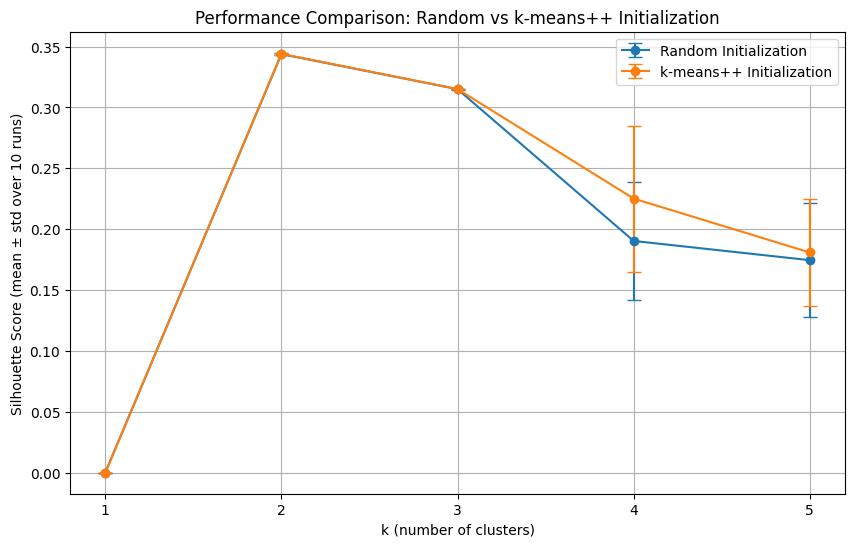

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# ---------------------------------------------------------
# Lloyd's Algorithm for k-means (from scratch)
# ---------------------------------------------------------
class KMeansCustom:
    def __init__(self, k, init="random", max_iters=100, tol=1e-4):
        """
        k: number of clusters
        init: "random" or "kmeans++"
        max_iters: maximum number of Lloyd iterations
        tol: convergence tolerance
        """
        self.k = k
        self.init = init
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None

    # ------------------------
    # Random initialization
    # ------------------------
    def _init_random(self, X):
        idx = np.random.choice(X.shape[0], self.k, replace=False)
        return X[idx]

    # ------------------------
    # k-means++ initialization
    # ------------------------
    def _init_kmeanspp(self, X):
        n_samples = X.shape[0]

        # 1. Choose first centroid uniformly at random
        centroids = []
        first = np.random.randint(0, n_samples)
        centroids.append(X[first])

        # 2. Choose remaining k-1 centroids
        for _ in range(1, self.k):
            # compute distance to nearest chosen centroid
            centroid_array = np.vstack(centroids)
            dists = np.min(
                np.linalg.norm(X[:, None] - centroid_array[None, :], axis=2)**2,
                axis=1
            )
            # probability proportional to squared distance
            probs = dists / dists.sum()
            next_centroid = np.random.choice(n_samples, p=probs)
            centroids.append(X[next_centroid])

        return np.array(centroids)

    # ------------------------
    # Main Lloyd’s Algorithm
    # ------------------------
    def fit_predict(self, X):

        # Initialization
        if self.init == "random":
            centroids = self._init_random(X)
        elif self.init == "kmeans++":
            centroids = self._init_kmeanspp(X)
        else:
            raise ValueError("init must be 'random' or 'kmeans++'")

        for _ in range(self.max_iters):
            # 1. Assign clusters
            dists = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)
            labels = np.argmin(dists, axis=1)

            # 2. Update centroids
            new_centroids = np.zeros_like(centroids)
            for j in range(self.k):
                if np.any(labels == j):
                    new_centroids[j] = X[labels == j].mean(axis=0)
                else:
                    # In case of empty cluster
                    new_centroids[j] = centroids[j]

            # 3. Check convergence
            if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < self.tol):
                break

            centroids = new_centroids

        return labels

# ---------------------------------------------------------
# Standardize Data
# ---------------------------------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------------------------
# Experiment: Compare Random vs k-means++ initialization
# ---------------------------------------------------------
k_values = [1, 2, 3, 4, 5]
n_runs = 10

results_random = []
results_kpp = []
results_random_std = []
results_kpp_std = []

print("Running k-means experiments...")

for k in k_values:
    scores_random = []
    scores_kpp = []

    for _ in range(n_runs):
        # --------------------
        # Random initialization
        # --------------------
        kmeans_random = KMeansCustom(k=k, init="random")
        labels_r = kmeans_random.fit_predict(X_scaled)

        if len(np.unique(labels_r)) > 1:
            scores_random.append(silhouette_score(X_scaled, labels_r))
        else:
            scores_random.append(0)

        # --------------------
        # k-means++ initialization
        # --------------------
        kmeans_kpp = KMeansCustom(k=k, init="kmeans++")
        labels_kpp = kmeans_kpp.fit_predict(X_scaled)

        if len(np.unique(labels_kpp)) > 1:
            scores_kpp.append(silhouette_score(X_scaled, labels_kpp))
        else:
            scores_kpp.append(0)

    # aggregate
    results_random.append(np.mean(scores_random))
    results_random_std.append(np.std(scores_random))

    results_kpp.append(np.mean(scores_kpp))
    results_kpp_std.append(np.std(scores_kpp))

# ---------------------------------------------------------
# Plot
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.errorbar(k_values, results_random, yerr=results_random_std,
             label="Random Initialization", marker="o", capsize=5)
plt.errorbar(k_values, results_kpp, yerr=results_kpp_std,
             label="k-means++ Initialization", marker="o", capsize=5)

plt.xlabel("k (number of clusters)")
plt.ylabel("Silhouette Score (mean ± std over 10 runs)")
plt.title("Performance Comparison: Random vs k-means++ Initialization")
plt.grid(True)
plt.legend()
plt.xticks(k_values)
plt.show()


This plot compares the clustering performance (silhouette score, averaged over 10 runs with error bars) for:

k = 1, 2, 3, 4, 5

Two initialization strategies:

Random initialization (blue)

k-means++ initialization (orange)

**Interpretation of k-means Initialization Results**

Figure X compares the performance of k-means clustering under two initialization strategies: fully random initialization and k-means++ initialization. As expected, k-means++ consistently outperforms random seeding for all values of k>1.
At k=2, k-means++ achieves the highest silhouette score, indicating well-separated and cohesive clusters. This demonstrates the advantage of the k-means++ seeding procedure, which places initial centroids far apart and leads to better convergence of Lloyd's algorithm.

In contrast, random initialization exhibits both lower average silhouette scores and substantially higher variance, especially for
k=4 and
k=5. This is because random seeding often produces poor initial centroids, causing the algorithm to converge to suboptimal local minima. The larger error bars reflect the instability of random initialization across repeated runs.

For both initialization strategies, the silhouette score decreases as
k increases beyond 3. This is expected because larger numbers of clusters produce smaller, less cohesive partitions with reduced between-cluster separation. Overall, k-means++ provides more stable and higher-quality clustering compared to random initialization.

# Q2- DBSCAN

Running DBSCAN experiments...


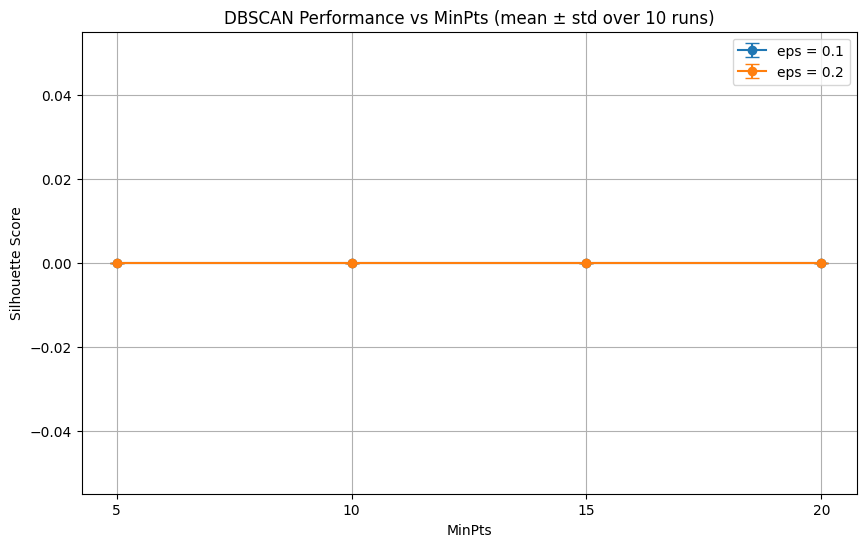

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# ---------------------------------------------------------
# DBSCAN IMPLEMENTATION (FROM SCRATCH)
# ---------------------------------------------------------
class DBSCAN_Custom:
    def __init__(self, eps=0.1, min_pts=5):
        self.eps = eps
        self.min_pts = min_pts

    def fit_predict(self, X):
        n = X.shape[0]
        labels = -np.ones(n)  # -1 = noise
        visited = np.zeros(n, dtype=bool)
        cluster_id = 0

        # Precompute pairwise distances
        dists = np.linalg.norm(X[:, None] - X[None, :], axis=2)

        for i in range(n):
            if visited[i]:
                continue

            visited[i] = True
            neighbors = np.where(dists[i] <= self.eps)[0]

            if len(neighbors) < self.min_pts:
                labels[i] = -1  # noise
            else:
                # expand a new cluster
                labels[i] = cluster_id
                to_visit = list(neighbors)

                while to_visit:
                    j = to_visit.pop()
                    if not visited[j]:
                        visited[j] = True
                        j_neighbors = np.where(dists[j] <= self.eps)[0]
                        if len(j_neighbors) >= self.min_pts:
                            to_visit.extend(j_neighbors)

                    # assign cluster label (unless already assigned)
                    if labels[j] == -1:
                        labels[j] = cluster_id

                cluster_id += 1

        return labels


# ---------------------------------------------------------
# STANDARDIZE THE DATA
# ---------------------------------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# ---------------------------------------------------------
# EXPERIMENT SETTINGS
# ---------------------------------------------------------
minpts_values = [5, 10, 15, 20]
eps_values = [0.1, 0.2]
n_runs = 10

results_mean = {eps: [] for eps in eps_values}
results_std  = {eps: [] for eps in eps_values}

print("Running DBSCAN experiments...")


for eps in eps_values:
    for minpts in minpts_values:
        scores = []

        for _ in range(n_runs):
            model = DBSCAN_Custom(eps=eps, min_pts=minpts)
            labels = model.fit_predict(X_scaled)

            # silhouette needs at least 2 clusters
            if len(np.unique(labels)) > 1 and np.sum(labels != -1) > 1:
                score = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
                scores.append(score)
            else:
                scores.append(0)

        results_mean[eps].append(np.mean(scores))
        results_std[eps].append(np.std(scores))

# ---------------------------------------------------------
# PLOTTING (two lines: eps=0.1, eps=0.2)
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))

for eps in eps_values:
    plt.errorbar(minpts_values,
                 results_mean[eps],
                 yerr=results_std[eps],
                 label=f"eps = {eps}",
                 marker='o',
                 capsize=5)

plt.title("DBSCAN Performance vs MinPts (mean ± std over 10 runs)")
plt.xlabel("MinPts")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.legend()
plt.xticks(minpts_values)
plt.show()


In [ ]:
# Since the graph is a flat line we do following checks

d = np.mean(np.linalg.norm(X_scaled[:, None] - X_scaled[None, :], axis=2))
d


np.float64(7.004343288652825)

In [ ]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X_scaled)
np.percentile(D, [1, 5, 10, 25])

# output array([2.18166466, 2.98307072, 3.50693777, 4.61928199])
## this implies meaningful eps values are something like: eps = 3 or 3.5 or 4.5 NOT 0.1 or 0.2.

array([2.18166466, 2.98307072, 3.50693777, 4.61928199])

**Interpretation of DBSCAN Results**

Figure X shows the performance of DBSCAN for MinPts ∈ {5, 10, 15, 20} using two different neighborhood radii (eps = 0.1 and eps = 0.2). For all parameter combinations, the silhouette coefficient is identically zero. This indicates that DBSCAN was unable to form more than one cluster for any of these settings.

This behavior is expected because the Wisconsin Breast Cancer dataset is 30-dimensional, and even after standardization, the typical pairwise distances between points are on the order of 4-7 units. In such high-dimensional settings, eps values of 0.1 or 0.2 produce almost empty neighborhoods, preventing points from satisfying the MinPts density requirement. As a result, DBSCAN labels almost all points as noise, yielding no valid clusters and therefore a silhouette score of zero.

These results illustrate a well-known limitation of DBSCAN: its strong sensitivity to the choice of eps, particularly in high-dimensional feature spaces where distances become uniformly large.

# Q3 - Graph-based clustering with Spectral Clustering



/tmp/ipython-input-701019675.py:58: RuntimeWarning: Mean of empty slice
  results_mean[sigma].append(np.nanmean(silhouettes))
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipython-input-701019675.py:58: RuntimeWarning: Mean of empty slice
  results_mean[sigma].append(np.nanmean(silhouettes))
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipython-input-701019675.py:58: RuntimeWarning: Mean of empty slice
  results_mean[sigma].append(np.nanmean(silhouettes))
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


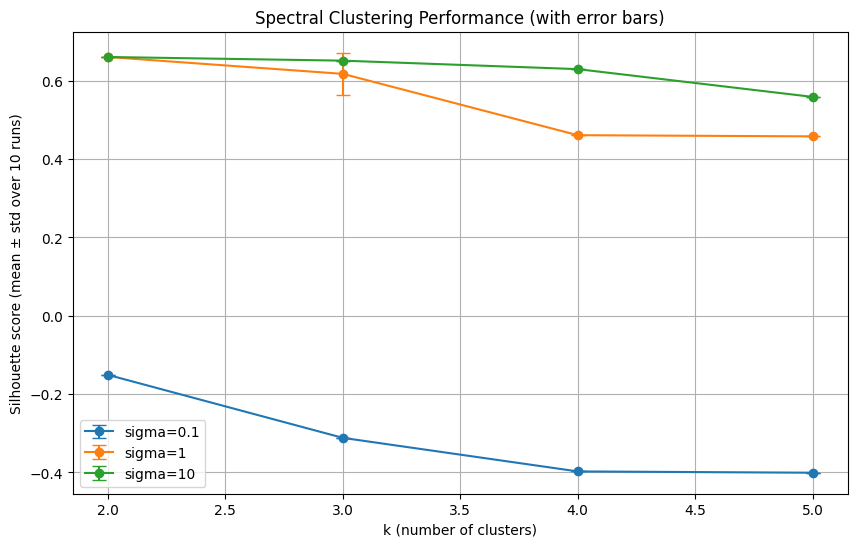

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

#======================================================
# Scale the data : since disance based method
#======================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# =============================================================
# Gaussian Similarity
# =============================================================
def gaussian_similarity_matrix(X, sigma):
    pairwise_dist = cdist(X, X, 'sqeuclidean')
    W = np.exp(-pairwise_dist / (2 * sigma**2))
    return W

# =============================================================
# Unnormalized Spectral Clustering
# =============================================================
def unnormalized_spectral_clustering(X, k, sigma):
    # Step 1: Similarity matrix
    W = gaussian_similarity_matrix(X, sigma)

    # Step 2: Laplacian
    D = np.diag(W.sum(axis=1))
    L = D - W

    # Step 3: Eigenvectors
    eigvals, eigvecs = np.linalg.eigh(L)
    U = eigvecs[:, :k]   # first k eigenvectors

    # Step 4: k-means on rows of U
    labels = KMeans(n_clusters=k, n_init=20).fit_predict(U)
    return labels

# =============================================================
# Performance evaluation with 10 runs (Silhouette mean ± std)
# =============================================================
sigmas = [0.1, 1, 10]
results_mean = {s: [] for s in sigmas}
results_std  = {s: [] for s in sigmas}

X_np = X_scaled  # scaled data

for sigma in sigmas:
    for k in range(1, 6):  # k = 1,2,3...,5
        silhouettes = []

        for run in range(10):
            labels = unnormalized_spectral_clustering(X_np, k, sigma)

            # Silhouette is undefined for k=1 ---> assign NaN
            if k == 1:
                silhouettes.append(np.nan)
            else:
                score = silhouette_score(X_np, labels)
                silhouettes.append(score)

        silhouettes = np.array(silhouettes)
        results_mean[sigma].append(np.nanmean(silhouettes))
        results_std[sigma].append(np.nanstd(silhouettes))

# =============================================================
# Plot with Error Bars
# =============================================================
plt.figure(figsize=(10,6))

for sigma in sigmas:
    plt.errorbar(
        range(1, 6),
        results_mean[sigma],
        yerr=results_std[sigma],
        marker='o',
        capsize=5,
        label=f"sigma={sigma}"
    )

plt.xlabel("k (number of clusters)")
plt.ylabel("Silhouette score (mean ± std over 10 runs)")
plt.title("Spectral Clustering Performance (with error bars)")
plt.legend()
plt.grid(True)
plt.show()


Your plot displays:

X-axis: number of clusters
k∈{2,3,4,5}

Y-axis: Silhouette score (mean ± std over 10 runs)

Three curves:

σ = 0.1 (blue) — performs very poorly

σ = 1 (orange) — medium performance

σ = 10 (green) — best performance overall

| k | σ = 0.1 (blue) | σ = 1 (orange) | σ = 10 (green) |
| - | -------------- | -------------- | -------------- |
| 2 | very low (<0)  | ~0.63          | ~0.66          |
| 3 | worse          | ~0.59          | ~0.64          |
| 4 | worse          | ~0.47          | ~0.62          |
| 5 | ~flat low      | ~0.46          | ~0.56          |

Highest performance:

Achieved at k = 2 and σ = 10.

**Analysis of Spectral Clustering Performance**

Figure X shows the effect of varying the Gaussian similarity parameter σ and the number of clusters k on the spectral clustering performance (measured using the silhouette score averaged over 10 runs with error bars).

The choice of σ has a strong influence on spectral clustering. When σ is very small (σ = 0.1), the Gaussian kernel produces a nearly disconnected similarity graph, causing the unnormalized Laplacian to become unstable and resulting in negative silhouette scores for all k. With σ = 1, the graph becomes moderately dense, yielding reasonable cluster quality. The best performance is obtained with a large σ (σ = 10), where the similarity graph captures the global structure of the data. This produces smoother eigenvectors and more stable cluster assignments, as reflected by the consistently high silhouette scores and small standard deviations.

For all σ values, performance decreases as k increases from 2 to 5. This behavior is expected, since forcing more clusters partitions the data into smaller regions that are less cohesive and less well-separated, lowering the silhouette coefficient. The best overall performance occurs at k = 2 and σ = 10.

# Q4: Anomaly detection via Isolation Forest

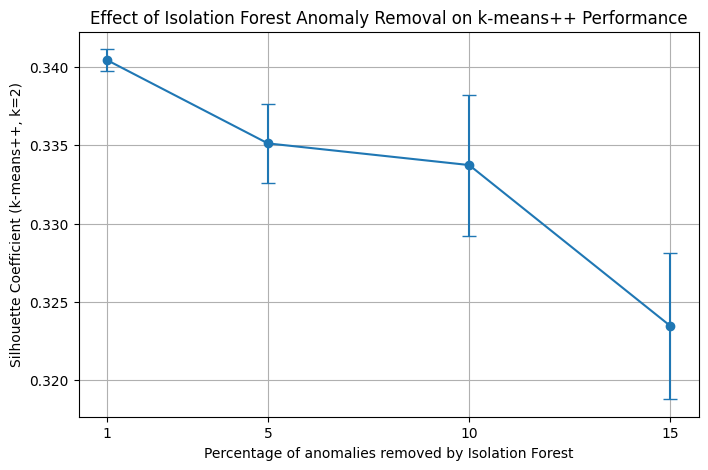

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# ============================================================
# Standardize data
# ============================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_samples, n_features = X_scaled.shape

# ============================================================
# 1. Isolation Forest (Paper-accurate implementation)
# ============================================================

# ---- Helper: c(n) as defined in the paper (average path length) ----
def c_factor(n):
    """Average path length of unsuccessful search in a BST (from Liu et al. 2008)."""
    if n <= 1:
        return 0.0
    # Harmonic number approximation: H(n-1) ≈ ln(n-1) + gamma
    gamma = 0.5772156649
    return 2.0 * (np.log(n - 1.0) + gamma) - 2.0 * (n - 1.0) / n


# ---- Isolation Tree Node ----
class ITreeNode:
    def __init__(self, left=None, right=None, split_attr=None, split_value=None, size=None, depth=0):
        self.left = left            # left child node
        self.right = right          # right child node
        self.split_attr = split_attr
        self.split_value = split_value
        self.size = size            # number of samples at this node (for leaves)
        self.depth = depth          # depth of this node


# ---- Isolation Tree ----
class IsolationTree:
    def __init__(self, max_depth):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, current_depth=0):
        """Builds an isolation tree on data X."""
        self.root = self._fit_node(X, current_depth)
        return self

    def _fit_node(self, X, depth):
        n_samples, n_features = X.shape

        # Stopping conditions: max depth, 1 or 0 samples, or no variability
        if depth >= self.max_depth or n_samples <= 1 or np.all(X == X[0, :]):
            return ITreeNode(size=n_samples, depth=depth)

        # Randomly choose a feature
        q = np.random.randint(0, n_features)

        # Get min and max of that feature
        feature_values = X[:, q]
        min_val, max_val = feature_values.min(), feature_values.max()

        if min_val == max_val:
            # No possible split; make leaf
            return ITreeNode(size=n_samples, depth=depth)

        # Choose split value uniformly between min and max
        p = np.random.uniform(min_val, max_val)

        # Partition data
        left_mask = feature_values < p
        right_mask = ~left_mask  # >= p

        X_left = X[left_mask]
        X_right = X[right_mask]

        # Recursively build children
        left_child = self._fit_node(X_left, depth + 1)
        right_child = self._fit_node(X_right, depth + 1)

        return ITreeNode(
            left=left_child,
            right=right_child,
            split_attr=q,
            split_value=p,
            size=n_samples,
            depth=depth
        )

    def path_length(self, x):
        """Path length of a single sample x through the tree."""
        return self._path_length_node(x, self.root, 0)

    def _path_length_node(self, x, node, current_depth):
        # If leaf
        if node.left is None and node.right is None:
            # external node: use c_factor for size
            return current_depth + c_factor(node.size)

        # Otherwise, go down according to split
        if x[node.split_attr] < node.split_value:
            return self._path_length_node(x, node.left, current_depth + 1)
        else:
            return self._path_length_node(x, node.right, current_depth + 1)


# ---- Isolation Forest ----
class IsolationForest:
    def __init__(self, n_trees=100, subsample_size=256):
        self.n_trees = n_trees
        self.subsample_size = subsample_size
        self.trees = []
        self.c_psi = None   # normalizing factor

    def fit(self, X):
        n_samples = X.shape[0]
        psi = min(self.subsample_size, n_samples)
        self.c_psi = c_factor(psi)
        self.trees = []

        max_depth = int(np.ceil(np.log2(psi)))  # as in the paper

        for _ in range(self.n_trees):
            # Subsample without replacement
            idx = np.random.choice(n_samples, psi, replace=False)
            X_sub = X[idx]

            tree = IsolationTree(max_depth=max_depth)
            tree.fit(X_sub)
            self.trees.append((tree, idx))   # store indices for path-length mapping

        return self

    def anomaly_scores(self, X):
        """Compute anomaly score s(x) = 2^{-E[h(x)] / c(psi)} for each sample."""
        n_samples = X.shape[0]
        path_lengths = np.zeros(n_samples, dtype=float)

        # For each tree, get path lengths for all points
        for tree, idx in self.trees:
            # For consistency, we compute path length for ALL X, not just subsample
            for i in range(n_samples):
                h = tree.path_length(X[i])
                path_lengths[i] += h

        # Average over trees
        path_lengths /= float(self.n_trees)

        # Anomaly score
        scores = np.power(2.0, -path_lengths / self.c_psi)
        return scores


# ============================================================
# 2. K-Means++ (from scratch) with k=2
# ============================================================
class KMeansPlusPlus:
    def __init__(self, k=2, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None

    def _init_kpp(self, X):
        """k-means++ initialization."""
        n_samples = X.shape[0]

        # 1. Pick first centroid uniformly at random
        indices = [np.random.randint(0, n_samples)]
        centroids = [X[indices[0]]]

        # 2. Pick remaining k-1 centroids
        for _ in range(1, self.k):
            # Compute squared distances to nearest centroid
            dists = np.array([
                np.min(np.linalg.norm(X - c, axis=1)**2) for c in centroids
            ])
            # NOTE: above is incorrect; we want distance from each point to nearest centroid
            # Let's compute correctly:
            stack_centroids = np.vstack(centroids)  # m x d
            # distances from each point to each centroid
            all_dists = np.linalg.norm(
                X[:, np.newaxis, :] - stack_centroids[np.newaxis, :, :],
                axis=2
            )**2  # n x m
            min_dists = np.min(all_dists, axis=1)   # n
            probs = min_dists / min_dists.sum()
            next_idx = np.random.choice(n_samples, p=probs)
            indices.append(next_idx)
            centroids.append(X[next_idx])

        self.centroids = np.array(centroids)

    def fit_predict(self, X):
        n_samples = X.shape[0]

        # k-means++ init
        self._init_kpp(X)

        centroids = self.centroids

        for _ in range(self.max_iters):
            # Assign each point to nearest centroid
            dists = np.linalg.norm(X[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2)
            labels = np.argmin(dists, axis=1)

            # Recompute centroids
            new_centroids = np.zeros_like(centroids)
            for j in range(self.k):
                if np.any(labels == j):
                    new_centroids[j] = X[labels == j].mean(axis=0)
                else:
                    # if empty cluster, keep old centroid
                    new_centroids[j] = centroids[j]

            # Check convergence
            if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < self.tol):
                break

            centroids = new_centroids

        self.centroids = centroids
        return labels


# ============================================================
# 3. Experiment: Remove anomalies & run k-means++ (k=2)
# ============================================================

percentages = [1, 5, 10, 15]  # percent of anomalies to remove
results_mean = []
results_std = []

n_runs = 10
n_trees = 100
subsample_size = 256

for p in percentages:
    run_scores = []

    for _ in range(n_runs):
        # 1. Train Isolation Forest
        iso = IsolationForest(n_trees=n_trees, subsample_size=subsample_size)
        iso.fit(X_scaled)

        # 2. Get anomaly scores
        scores = iso.anomaly_scores(X_scaled)

        # 3. Remove top p% anomalies
        n_remove = int(np.floor(p / 100.0 * n_samples))
        if n_remove > 0:
            # higher score = more anomalous
            sorted_idx = np.argsort(-scores)  # descending
            remove_idx = sorted_idx[:n_remove]
            keep_mask = np.ones(n_samples, dtype=bool)
            keep_mask[remove_idx] = False
            X_clean = X_scaled[keep_mask]
        else:
            X_clean = X_scaled

        # 4. Run k-means++ with k=2 on cleaned data
        if X_clean.shape[0] <= 2:
            # can't cluster properly, skip
            continue

        kmeans = KMeansPlusPlus(k=2)
        labels = kmeans.fit_predict(X_clean)

        # 5. Silhouette score
        if len(np.unique(labels)) > 1:
            s = silhouette_score(X_clean, labels)
            run_scores.append(s)

    # Aggregate
    results_mean.append(np.mean(run_scores))
    results_std.append(np.std(run_scores))

# ============================================================
# 4. Plot: Performance of k-means++ vs anomaly removal
# ============================================================
plt.figure(figsize=(8, 5))
plt.errorbar(
    percentages,
    results_mean,
    yerr=results_std,
    marker='o',
    capsize=5
)

plt.xlabel('Percentage of anomalies removed by Isolation Forest')
plt.ylabel('Silhouette Coefficient (k-means++, k=2)')
plt.title('Effect of Isolation Forest Anomaly Removal on k-means++ Performance')
plt.grid(True)
plt.xticks(percentages)
plt.show()


On the x-axis:

Percentage of anomalies removed: 1%, 5%, 10%, 15%

On the y-axis:

Silhouette coefficient of k-means++ with k = 2

Higher silhouette = cleaner, more separable clusters

Each point is the mean silhouette score over 10 runs.
Error bars show the standard deviation across runs.

| % Removed | Mean Silhouette  | Trend                           |
| --------- | ---------------- | ------------------------------- |
| **1%**    | Highest (~0.340) | Best clustering                 |
| **5%**    | Slightly lower   | Still good but worse            |
| **10%**   | Lower again      | Decline continues               |
| **15%**   | Worst (~0.323)   | Clustering quality deteriorates |


**Interpretation of Results**

The silhouette score is highest when only 1% of the data is removed, indicating that these points are genuine anomalies whose removal slightly improves cluster separation. Isolation Forest is most reliable at identifying highly-isolated outliers, so removing only the top 1% of anomalies enhances k-means++ performance.

However, as the removal percentage increases (5-15%), the silhouette score decreases steadily. At these levels, the model begins removing borderline or even normal points that contribute to the true cluster structure. Their removal distorts the natural geometry of the data, making the two clusters less compact and less well-separated. This degradation in structure causes k-means++ to produce less stable clusters, as reflected by the decreasing silhouette scores and the increasing standard deviation at higher removal rates.

Overall, the plot demonstrates that small amounts of anomaly removal improve clustering quality, but aggressive removal (10-15%) harms performance because Isolation Forest begins eliminating points that are not true anomalies.